In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import tensorflow as tf

In [2]:
df = pd.read_csv('/content/CTG.VN-BaoCao.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,14491.327148,14525.995117,14317.986328,14421.990234,14421.990234,6541979.0
1,2019-03-04,14491.327148,14803.341797,14456.659180,14699.336914,14699.336914,9808643.0
2,2019-03-05,14699.336914,15046.019531,14595.332031,14734.004883,14734.004883,11457790.0
3,2019-03-06,14768.672852,14838.009766,14630.000000,14768.672852,14768.672852,5325766.0
4,2019-03-07,14907.345703,15046.019531,14803.341797,14907.345703,14907.345703,11616883.0


In [4]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Train test 8:2

In [5]:
# Split data into train and test sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [6]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

In [7]:
X_train, y_train

(array([[   0],
        [   1],
        [   2],
        ...,
        [1050],
        [1051],
        [1052]]),
 array([14421.990234, 14699.336914, 14734.004883, ..., 25147.326172,
        25013.087891, 24610.373047]))

In [8]:
# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())



Predictions: [29932.28723367 29946.74721088 29961.20718809 29975.6671653
 29990.12714251 30004.58711972 30019.04709693 30033.50707413
 30047.96705134 30062.42702855 30076.88700576 30091.34698297
 30105.80696018 30120.26693739 30134.72691459 30149.1868918
 30163.64686901 30178.10684622 30192.56682343 30207.02680064
 30221.48677784 30235.94675505 30250.40673226 30264.86670947
 30279.32668668 30293.78666389 30308.2466411  30322.7066183
 30337.16659551 30351.62657272 30366.08654993 30380.54652714
 30395.00650435 30409.46648155 30423.92645876 30438.38643597
 30452.84641318 30467.30639039 30481.7663676  30496.22634481
 30510.68632201 30525.14629922 30539.60627643 30554.06625364
 30568.52623085 30582.98620806 30597.44618526 30611.90616247
 30626.36613968 30640.82611689 30655.2860941  30669.74607131
 30684.20604852 30698.66602572 30713.12600293 30727.58598014
 30742.04595735 30756.50593456 30770.96591177 30785.42588898
 30799.88586618 30814.34584339 30828.8058206  30843.26579781
 30857.7257750

In [9]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.118
MAE: 3233.027
RMSE: 3731.196
MSLE: 0.017
-------------------


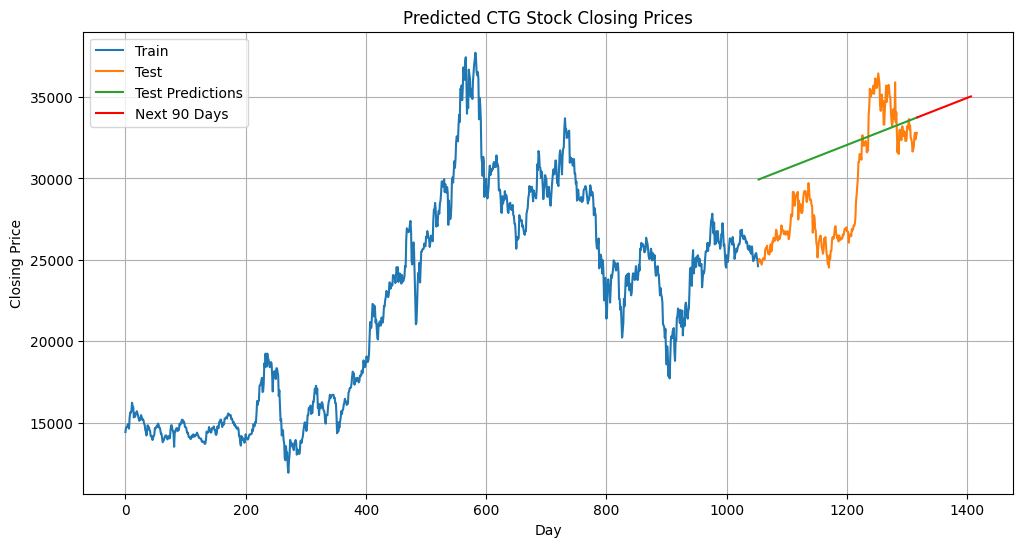

In [11]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted CTG Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Train test 7:3

In [12]:
df = pd.read_csv('/content/CTG.VN-BaoCao.csv')

In [13]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [14]:
# Split data into train and test sets
train_size = int(len(df) * 0.7)
train_data, test_data = df[:train_size], df[train_size:]

In [15]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [16]:
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())



Predictions: [30473.73942668 30492.30761673 30510.87580678 30529.44399683
 30548.01218689 30566.58037694 30585.14856699 30603.71675704
 30622.28494709 30640.85313715 30659.4213272  30677.98951725
 30696.5577073  30715.12589735 30733.6940874  30752.26227746
 30770.83046751 30789.39865756 30807.96684761 30826.53503766
 30845.10322772 30863.67141777 30882.23960782 30900.80779787
 30919.37598792 30937.94417797 30956.51236803 30975.08055808
 30993.64874813 31012.21693818 31030.78512823 31049.35331829
 31067.92150834 31086.48969839 31105.05788844 31123.62607849
 31142.19426855 31160.7624586  31179.33064865 31197.8988387
 31216.46702875 31235.0352188  31253.60340886 31272.17159891
 31290.73978896 31309.30797901 31327.87616906 31346.44435912
 31365.01254917 31383.58073922 31402.14892927 31420.71711932
 31439.28530937 31457.85349943 31476.42168948 31494.98987953
 31513.55806958 31532.12625963 31550.69444969 31569.26263974
 31587.83082979 31606.39901984 31624.96720989 31643.53539995
 31662.10359

In [17]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



In [18]:
from sklearn.metrics import mean_absolute_error

# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.235
MAE: 6240.569
RMSE: 6628.914
MSLE: 0.05
-------------------


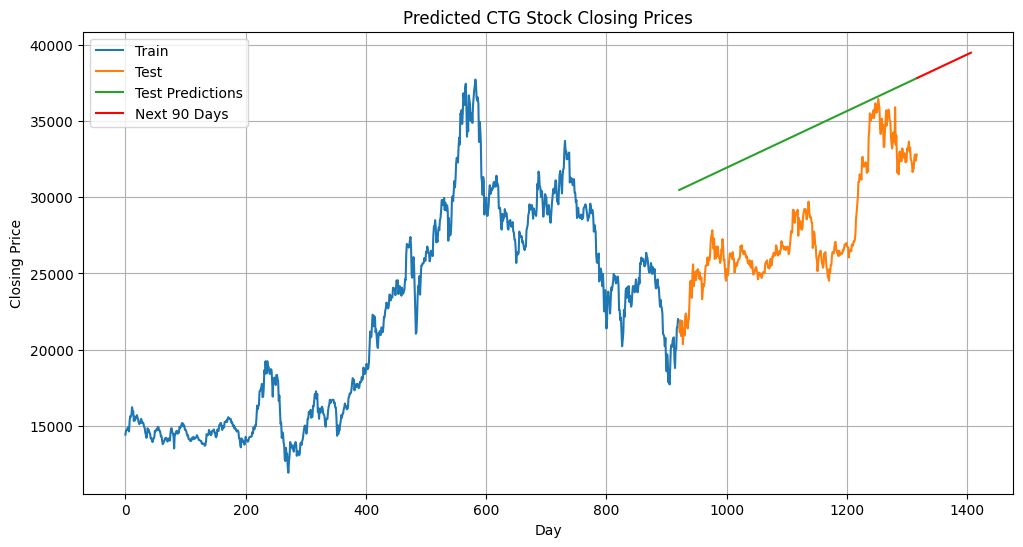

In [19]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted CTG Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Train test 9:1

In [20]:
df = pd.read_csv('/content/CTG.VN-BaoCao.csv')

In [21]:
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [22]:
# Split data into train and test sets
train_size = int(len(df) * 0.9)
train_data, test_data = df[:train_size], df[train_size:]

In [23]:
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [24]:
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
print("Predictions:", y_pred.flatten())



Predictions: [30148.49384571 30160.87471971 30173.25559371 30185.63646772
 30198.01734172 30210.39821572 30222.77908972 30235.15996372
 30247.54083773 30259.92171173 30272.30258573 30284.68345973
 30297.06433373 30309.44520774 30321.82608174 30334.20695574
 30346.58782974 30358.96870374 30371.34957774 30383.73045175
 30396.11132575 30408.49219975 30420.87307375 30433.25394775
 30445.63482176 30458.01569576 30470.39656976 30482.77744376
 30495.15831776 30507.53919177 30519.92006577 30532.30093977
 30544.68181377 30557.06268777 30569.44356177 30581.82443578
 30594.20530978 30606.58618378 30618.96705778 30631.34793178
 30643.72880579 30656.10967979 30668.49055379 30680.87142779
 30693.25230179 30705.6331758  30718.0140498  30730.3949238
 30742.7757978  30755.1566718  30767.53754581 30779.91841981
 30792.29929381 30804.68016781 30817.06104181 30829.44191581
 30841.82278982 30854.20366382 30866.58453782 30878.96541182
 30891.34628582 30903.72715983 30916.10803383 30928.48890783
 30940.86978

In [25]:
last_index = df.index[-1]

# Create arrays of consecutive integers for the next 90 days
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)
y_next_90_days = model.predict(x_next_90_days)



In [26]:
from sklearn.metrics import mean_absolute_error

# Calculating test metrics
mape_test = mean_absolute_percentage_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
msle_test = mean_squared_log_error(y_test, y_pred)

# Print result
print('---------TEST----------')
print("MAPE:", round(mape_test, 3))
print("MAE:", round(mae_test, 3))
print("RMSE:", round(rmse_test, 3))
print("MSLE:", round(msle_test, 3))
print('-------------------')

---------TEST----------
MAPE: 0.084
MAE: 2643.229
RMSE: 3032.375
MSLE: 0.009
-------------------


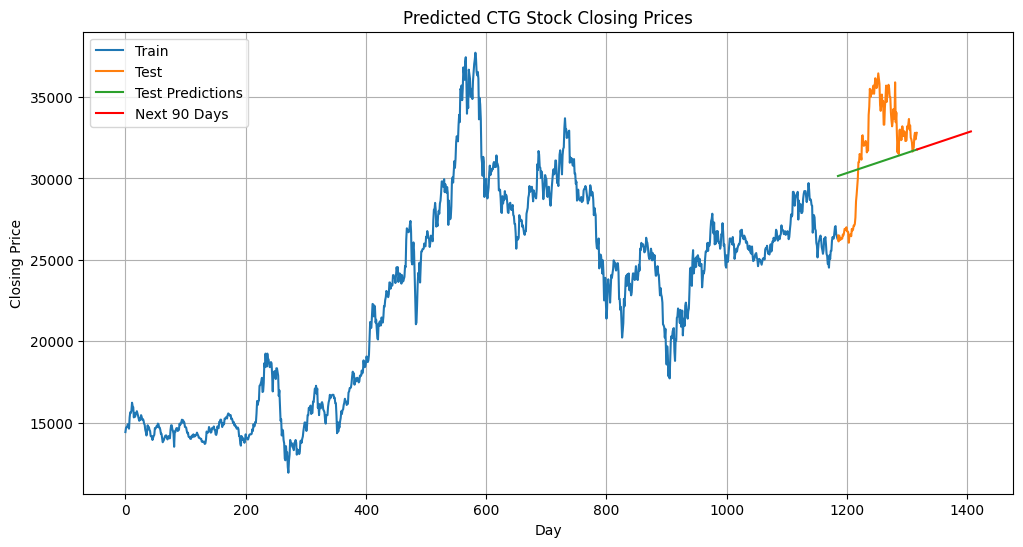

In [27]:
plt.figure(figsize=(12,6))

# Plot the train, test, and validation data
plt.plot(train_data.index, train_data['Close'], label='Train')
plt.plot(test_data.index, test_data['Close'], label='Test')

# Plot the predictions for test and validation sets
plt.plot(test_data.index, y_pred, label='Test Predictions')

# Plot the predictions for the next 90 days

plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days', color='red')

# Adding titles and labels
plt.title('Predicted CTG Stock Closing Prices')
plt.xlabel('Day')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()